In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('data.csv')


In [4]:
columns = data.columns
len(columns)

20

In [5]:
columns

Index(['Unnamed: 0', 'Episode', 'Station', 'Channel Type', 'Season', 'Year',
       'Date', 'Day of week', 'Start_time', 'End_time', 'Length',
       'Name of show', 'Name of episode', 'Genre', 'First time or rerun',
       '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?', 'Market Share_total',
       'Temperature in Montreal during episode'],
      dtype='object')

In [6]:
for i in range (len(columns)) :
     print(" {}\t{} ".format(columns[i] ,len(data[columns[i]].unique())))     

 Unnamed: 0	616656 
 Episode	6687 
 Station	24 
 Channel Type	2 
 Season	4 
 Year	4 
 Date	877 
 Day of week	7 
 Start_time	138322 
 End_time	138334 
 Length	39 
 Name of show	6687 
 Name of episode	86557 
 Genre	27 
 First time or rerun	2 
 # of episode in the season	2 
 Movie?	2 
 Game of the Canadiens during episode?	2 
 Market Share_total	545 
 Temperature in Montreal during episode	11829 


In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Name of episode,222579,0.360945
Temperature in Montreal during episode,83344,0.135155
Start_time,43,0.000070
End_time,43,0.000070
# of episode in the season,0,0.000000
First time or rerun,0,0.000000
Genre,0,0.000000
Movie?,0,0.000000
Name of show,0,0.000000
Length,0,0.000000


In [8]:
(data['Episode'] == data['Name of show']).unique()

array([ True])

As we can see in the table above, about 1/3 of __'Name of episode'__ is Nan. and i also think that it doesnt have important effects on the result.
so i wil drop this column.
Also, __'Name of show'__ is the same as __'Episode'__. i think they have important effects on the result as people usually watch certain shows. so i will keep one of them and drop the other one.

In [9]:
data.drop(columns[0],axis=1,inplace=True)
data.drop('Name of episode', axis=1 , inplace=True)
data.drop('Name of show',axis=1,inplace=True)

In my first try i also dropped the __'Temperature in Montreal during episode'__ column cause i doubt if it affects people when they want to watch tv. but i found my model more accurate while keeping this.
As it has a considerable number of Nans, i will first fill the Nans with 0 before droppping the rest Nans in the data (otherwise a great amount of datas would be lost)

In [10]:
data['Temperature in Montreal during episode'].fillna('0')
data = data.dropna(axis=0)
data.isnull().sum()

Episode                                   0
Station                                   0
Channel Type                              0
Season                                    0
Year                                      0
Date                                      0
Day of week                               0
Start_time                                0
End_time                                  0
Length                                    0
Genre                                     0
First time or rerun                       0
# of episode in the season                0
Movie?                                    0
Game of the Canadiens during episode?     0
Market Share_total                        0
Temperature in Montreal during episode    0
dtype: int64

In [11]:
data.head(3)

,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125


In [12]:
columns = data.columns
len(columns)

17

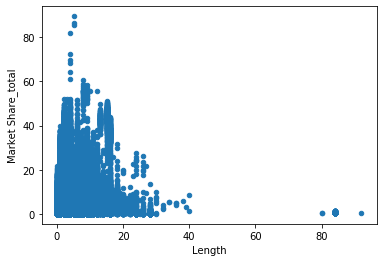

In [14]:
#scatter plot of "Market Share_total" and "length"
data.plot.scatter(x = columns[9], y = columns[15])

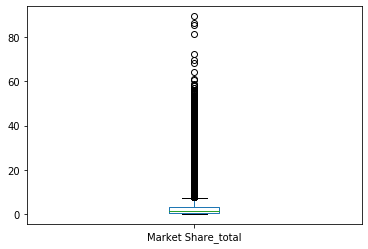

In [20]:
#boxplot for "Market Share_total"
data[columns[15]].plot.box()

# Conclusion
* __Episode__ and __Name of show__: are the same and i will drop one of them.
* __Temperature in Montreal during episode__: as i said it doesnt make sense to me that tempreture affects but i tryed and it gave me a slighty better results. so i will keep this.
* __Length__ : which considers 2 points for every 30minutes. i belevie it is very important. for example for myslef, i really dont like long shows.
* __Start_time__ and __End_time__: is very important cause people tend to watch tv in some spc hourse more often.for example people watch tv at nights more often and rarly in the mornings.
*to be able to analyse Start_time and End_time, i will converte them to the minutes.
* __Game of the Canadiens during episode?__: i guess that because game's reslut is important for canadians, more people will watch tv to track the game.
* __Year, Date, Season, and Day of Week__: holidays, seasons with more hollidays like summer(kids are usually free from school and tend to wach tv),weekends, some spc years(like those with election in them or important incidents) can be important for us. so i will keep them all.
* __Name of episode__: as we saw before,a great number of this data is Nan and it also doesnt convey any meaning here.I dont think people pay attention to the name of episode when they're planning to watch tv.
* i will keep other features although some of them like 'Station' or 'number of eps in season' doesnt make much sense to me.but i'm not sure anyway